In [4]:
import pandas as pd
import yahoofinance as yf
from pandas_datareader import data as pdr
import seaborn as sns
from datetime import datetime, timedelta, timezone
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
plt.rcParams.update({'figure.max_open_warning': 0})

In [5]:
ticker_list = ["TSLA", "AAPL", "GS", "A"]

SSLError: HTTPSConnectionPool(host='finance.yahoo.com', port=443): Max retries exceeded with url: /quote/%5EGSPC/history?period1=1663617600&period2=1668455999&interval=1d&frequency=1d&filter=history (Caused by SSLError("Can't connect to HTTPS URL because the SSL module is not available."))

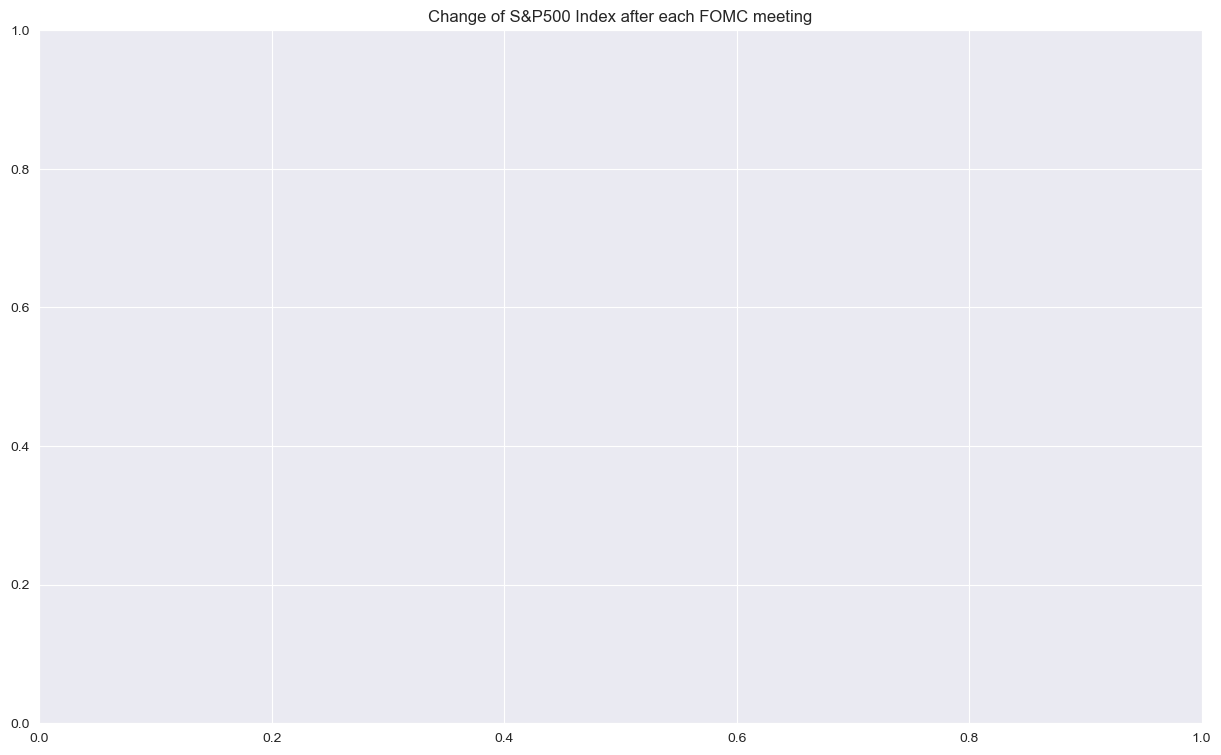

In [7]:
## List of FOMC dates

start_date = [
    "2022-09-21", "2022-07-27", "2022-06-15", "2022-05-04", "2022-03-16", 
    "2018-12-19", "2018-09-26", "2018-06-13", "2018-03-21",
    "2017-12-13", "2017-06-14", "2017-03-15", "2016-12-14", "2015-12-16", "2006-06-29", "2006-05-10",
    "2006-03-28", "2006-01-31", "2005-12-13","2005-11-01", "2005-09-01","2005-09-20","2005-08-09","2005-06-30",
    "2005-05-03", "2005-03-22", "2005-02-02","2004-12-14","2004-11-10","2004-09-21","2004-08-10","2004-06-30",
    "2000-05-16","2000-03-21", "2000-02-02"
    ]
end_date = []

for i in range(len(start_date)): ## Generate End dates for each FOMC meeting term
    start_date[i] = datetime.strptime(start_date[i], "%Y-%m-%d") - timedelta(days = 1)
    end_date.append(start_date[i] + timedelta(days = 55))
    start_date[i] = datetime.strftime(start_date[i], "%Y-%m-%d") 
    end_date[i] = datetime.strftime(end_date[i], "%Y-%m-%d") # end_date and start_date as strings

def collectData(ticker): ## Plot 30 days movement of ticker after FOMC dates. Last plot combines every dates.
    plt.figure(len(start_date), figsize = (15, 9))
    plt.title("Change of S&P500 Index after each FOMC meeting")
    for i in range(len(start_date)):
        data = pdr.get_data_yahoo(ticker, start=start_date[i], end=end_date[i])
        #print(data)
        x = data.index
        shift = datetime.strptime(start_date[i], "%Y-%m-%d")
        shift = shift.replace(tzinfo = timezone.utc)
        yPercent = 100 *(data['Close'] - data['Open'])  / data['Open']
        y = data['Close']
        x = (x - shift).days
        plt.figure(i, figsize = (15, 4))
        plt.plot(x, y)
        plt.title("S&P500 After FOMC Meeting on {}".format(start_date[i]))
        plt.figure(len(start_date))
        plt.plot(x, yPercent)
    

collectData('^GSPC')